In [1]:
import pandas as pd 
import numpy as np 
import pyodbc
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=LAPTOP-MEABQQJG;'
    'DATABASE=Instant Training;'
    'Trusted_Connection=yes;'
)


In [3]:
conn = pyodbc.connect(conn_str)

In [4]:
query = "SELECT * FROM dbo.shopping_trends"
df = pd.read_sql(query, conn)

df 

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [5]:
df.shape

(3900, 19)

In [6]:
df.dtypes

Customer_ID                   int64
Age                           int64
Gender                       object
Item_Purchased               object
Category                     object
Purchase_Amount_USD           int64
Location                     object
Size                         object
Color                        object
Season                       object
Review_Rating               float64
Subscription_Status          object
Payment_Method               object
Shipping_Type                object
Discount_Applied             object
Promo_Code_Used              object
Previous_Purchases            int64
Preferred_Payment_Method     object
Frequency_of_Purchases       object
dtype: object

In [7]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_USD', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Payment_Method',
       'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used',
       'Previous_Purchases', 'Preferred_Payment_Method',
       'Frequency_of_Purchases'],
      dtype='object')

In [8]:
df.isnull().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [9]:
df_cln = df.drop(columns=['Customer_ID'], axis= 1)

In [10]:
cols = df_cln.columns
cols

Index(['Age', 'Gender', 'Item_Purchased', 'Category', 'Purchase_Amount_USD',
       'Location', 'Size', 'Color', 'Season', 'Review_Rating',
       'Subscription_Status', 'Payment_Method', 'Shipping_Type',
       'Discount_Applied', 'Promo_Code_Used', 'Previous_Purchases',
       'Preferred_Payment_Method', 'Frequency_of_Purchases'],
      dtype='object')

In [11]:
df_cln.select_dtypes(include='object').nunique().sort_values()


Gender                       2
Subscription_Status          2
Discount_Applied             2
Promo_Code_Used              2
Category                     4
Size                         4
Season                       4
Payment_Method               6
Shipping_Type                6
Preferred_Payment_Method     6
Frequency_of_Purchases       7
Item_Purchased              25
Color                       25
Location                    50
dtype: int64

Text(0.5, 1.0, 'Average Review by frequency of purchases')

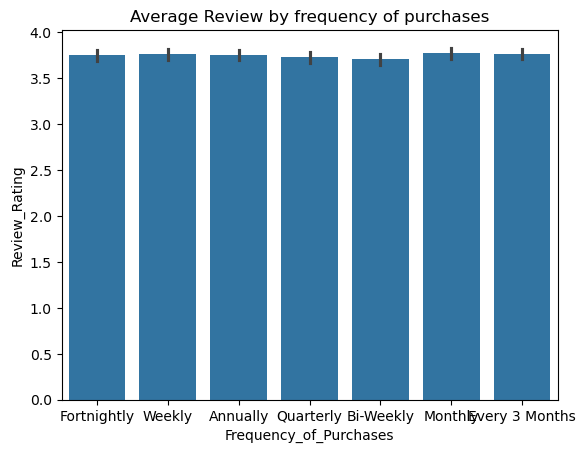

In [12]:
sns.barplot(data=df_cln, x='Frequency_of_Purchases', y='Review_Rating')
plt.title('Average Review by frequency of purchases')

Text(0.5, 1.0, 'Previous Purchases Distribution')

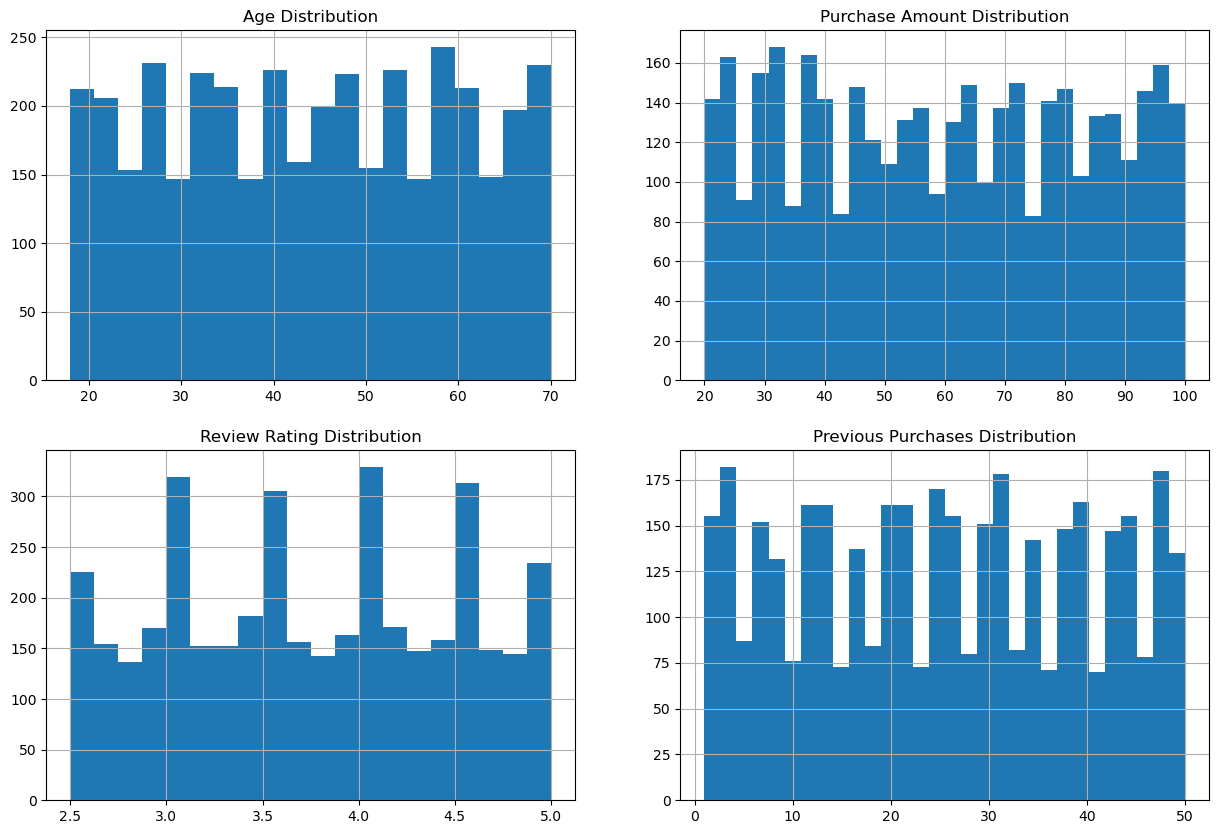

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
df_cln['Age'].hist(bins=20, ax=axes[0,0])
axes[0,0].set_title('Age Distribution')

df_cln['Purchase_Amount_USD'].hist(bins=30, ax=axes[0,1])
axes[0,1].set_title('Purchase Amount Distribution')

df_cln['Review_Rating'].hist(bins=20, ax=axes[1,0])
axes[1,0].set_title('Review Rating Distribution')

df_cln['Previous_Purchases'].hist(bins=30, ax=axes[1,1])
axes[1,1].set_title('Previous Purchases Distribution')

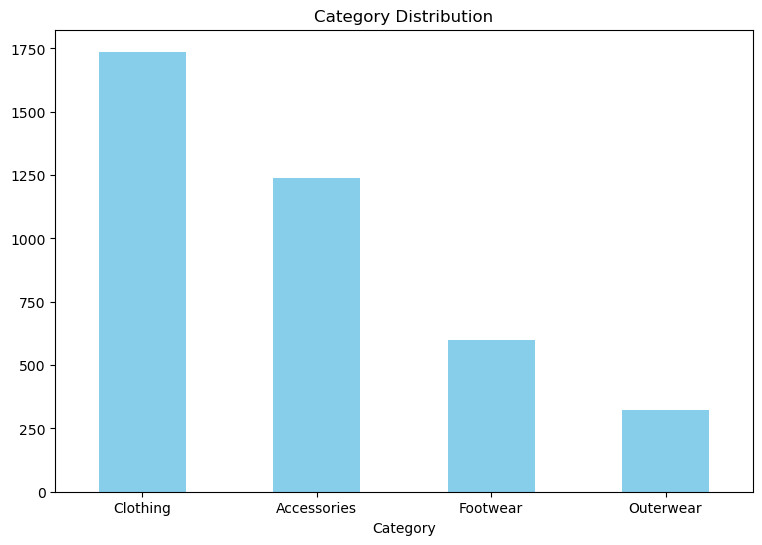

In [14]:
plt.figure(figsize=(9,6))
df_cln['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xticks(rotation=0)
plt.show()

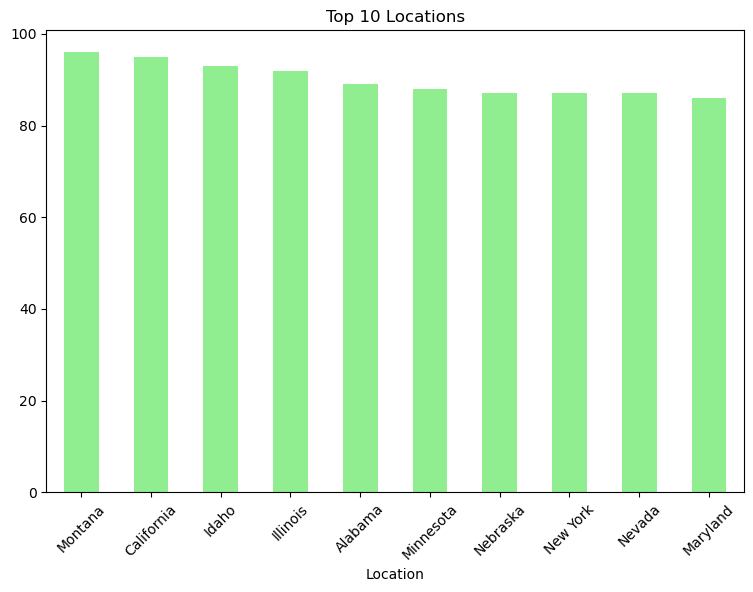

In [15]:
plt.figure(figsize=(9,6))
df_cln['Location'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Locations')
plt.xticks(rotation=45)
plt.show()

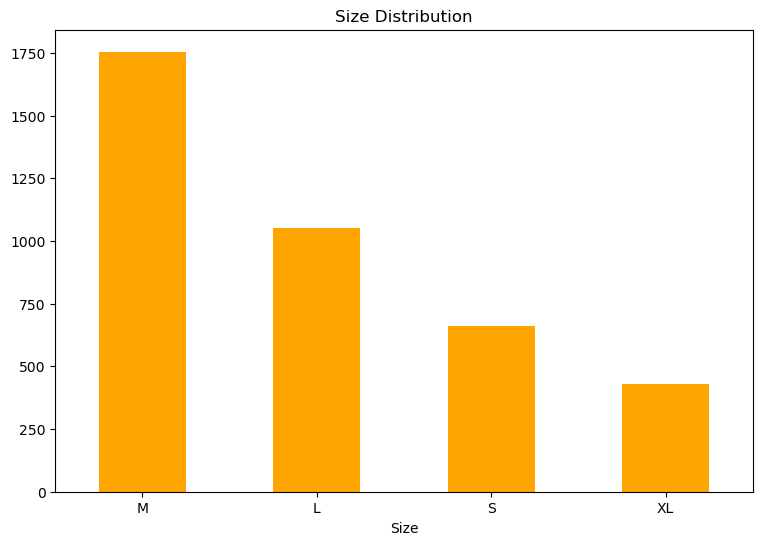

In [16]:
plt.figure(figsize=(9,6))
df_cln['Size'].value_counts().plot(kind='bar', color='orange')
plt.title('Size Distribution')
plt.xticks(rotation=0)
plt.show()

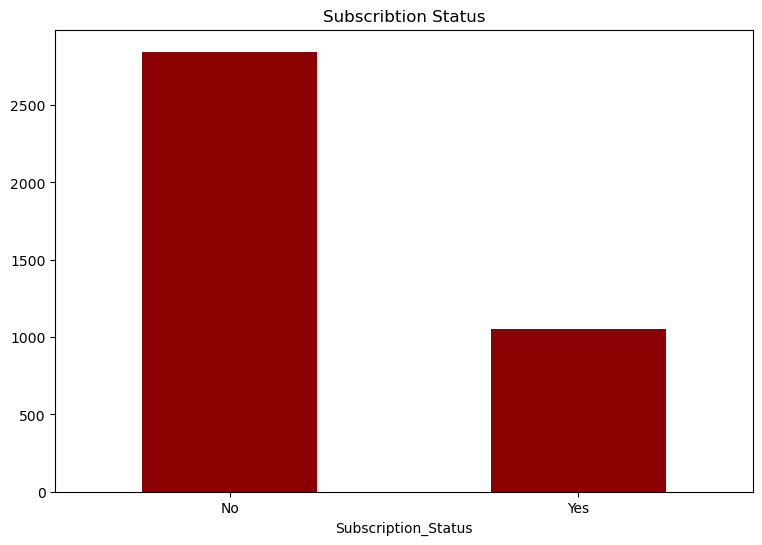

In [17]:
plt.figure(figsize=(9,6))
df_cln['Subscription_Status'].value_counts().plot(kind='bar', color='darkred')
plt.title('Subscribtion Status')
plt.xticks(rotation=0)
plt.show()

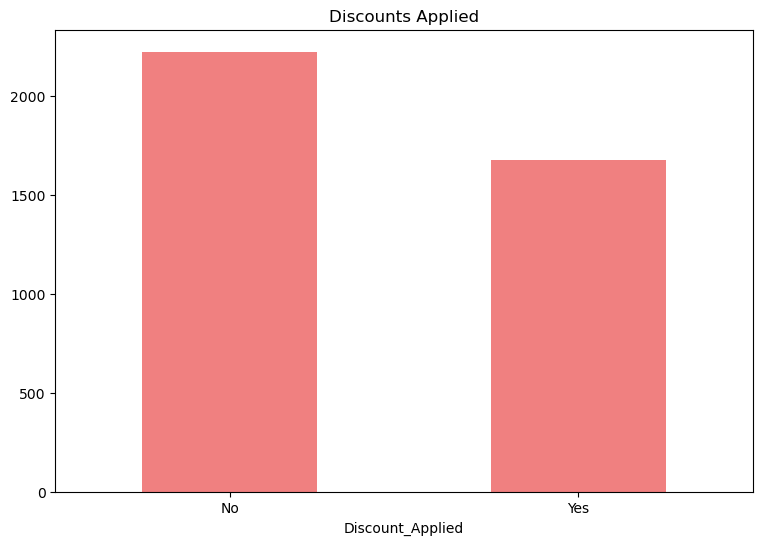

In [18]:
plt.figure(figsize=(9,6))
df_cln['Discount_Applied'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Discounts Applied')
plt.xticks(rotation=0)
plt.show()

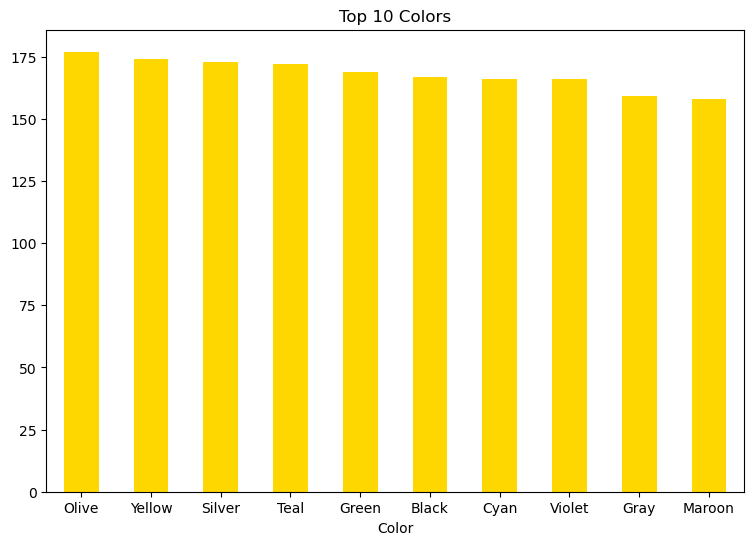

In [19]:
plt.figure(figsize=(9,6))
df_cln['Color'].value_counts().head(10).plot(kind='bar', color='gold')
plt.title('Top 10 Colors')
plt.xticks(rotation=0)
plt.show()

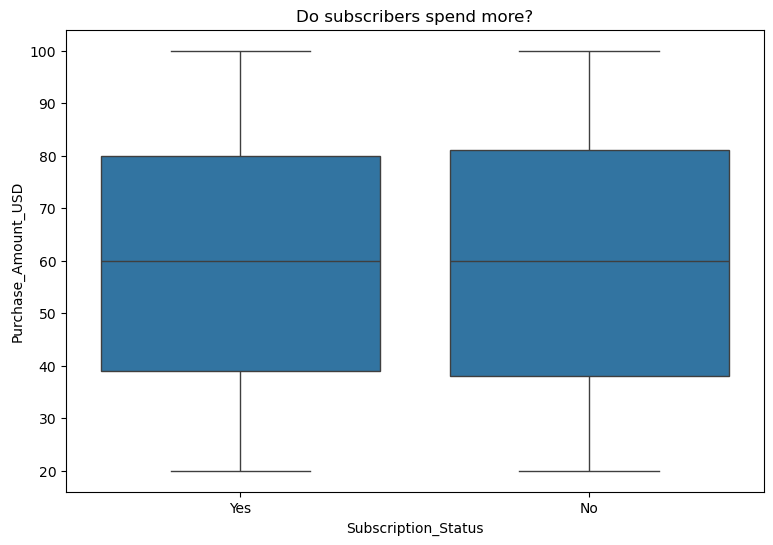

In [20]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df_cln, x='Subscription_Status', y='Purchase_Amount_USD')
plt.title('Do subscribers spend more?')
plt.show()

Text(0.5, 1.0, 'Impact of discounts on spending')

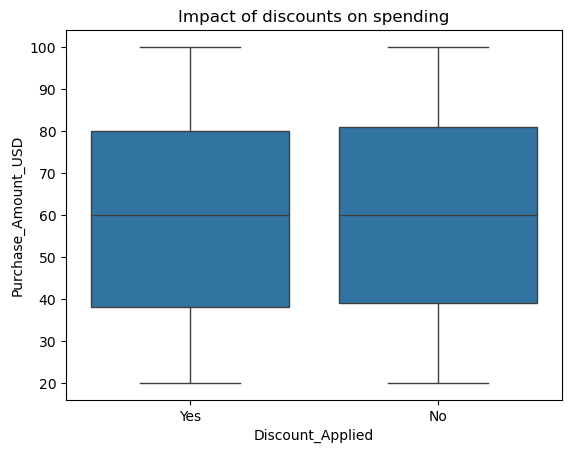

In [21]:
sns.boxplot(data=df_cln, x='Discount_Applied', y='Purchase_Amount_USD')
plt.title('Impact of discounts on spending')

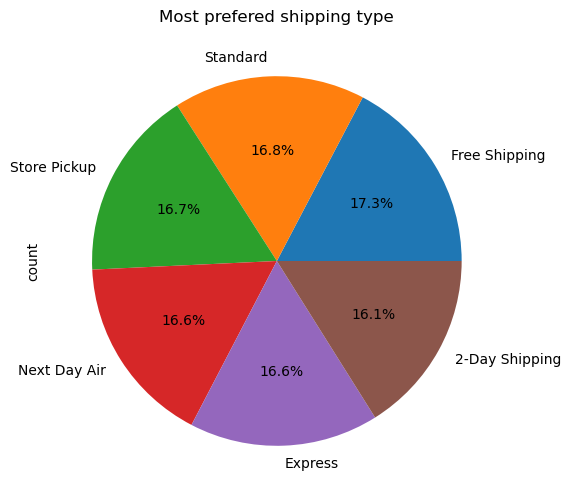

In [22]:
plt.figure(figsize=(9,6))
df_cln['Shipping_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Most prefered shipping type')
plt.show()

In [23]:
df_cln['Age'].min()

18

In [24]:
df_cln['Age_Group'] = pd.cut(df_cln['Age'], bins=[0, 25, 35, 45, 55, 100], 
                            labels=['18-25', '26-35', '36-45', '46-55', '55+'])

Text(0.5, 1.0, 'Average Spending by Age Group')

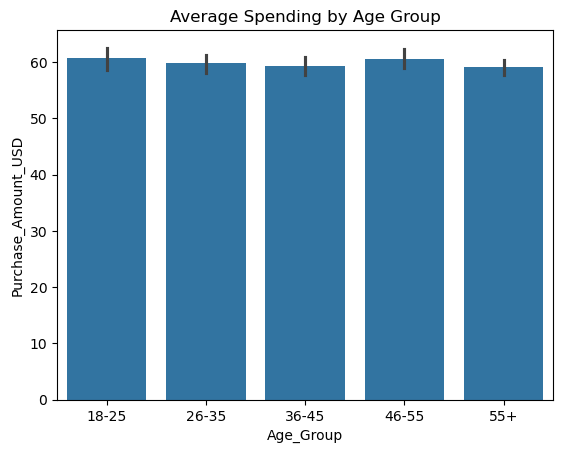

In [25]:
sns.barplot(data=df_cln, x='Age_Group', y='Purchase_Amount_USD')
plt.title('Average Spending by Age Group')

Text(0.5, 1.0, 'Loyalty vs Spending')

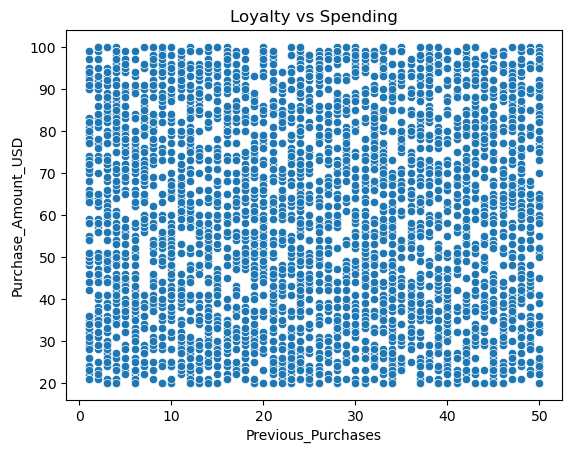

In [26]:
sns.scatterplot(data=df_cln, x='Previous_Purchases', y='Purchase_Amount_USD')
plt.title('Loyalty vs Spending')

Text(0.5, 1.0, 'Spending by Purchase Frequency')

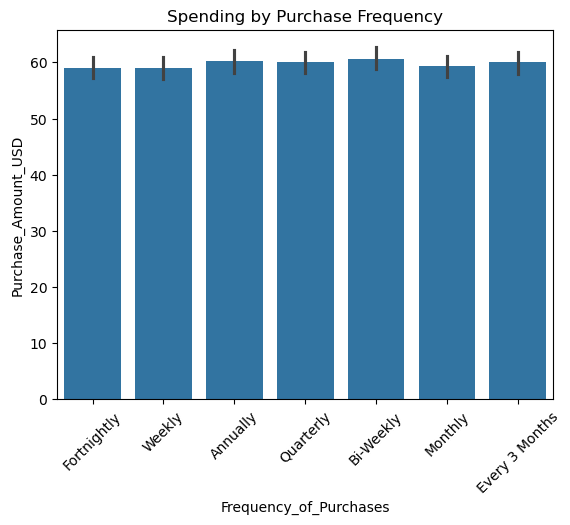

In [27]:
sns.barplot(data=df_cln, x='Frequency_of_Purchases', y='Purchase_Amount_USD')
plt.xticks(rotation=45)
plt.title('Spending by Purchase Frequency')

In [28]:
px.histogram(df_cln, x='Category', color='Gender', barmode='group', title='Category comparison by Gender')

In [29]:
px.pie(df_cln, names='Gender', values='Purchase_Amount_USD', title='Spending Distribution by Gender')

In [30]:
px.histogram(df_cln, x='Payment_Method', y='Purchase_Amount_USD', color='Payment_Method', title='Payment method spending distribution')

In [31]:
season_total = (df_cln.groupby('Season')['Purchase_Amount_USD'].sum().reset_index().sort_values(by='Purchase_Amount_USD', ascending=False))

In [32]:
px.bar(season_total, x='Season', y='Purchase_Amount_USD', color='Season', title='Season spending distribution')

In [37]:
df_cln.to_excel('customer_purchase_data.xlsx', index=False)